# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1]:
import pandas as pd

In [8]:
# Load the dataset with proper indexing
df = pd.read_csv('green_tripdata_2018-09.csv')

# Check if the dataset is loaded properly
if not df.empty:
    print("Dataset loaded successfully with proper indexing.")
else:
    print("Error: Failed to load the dataset.")

Dataset loaded successfully with proper indexing.


# 2- EDA

In [12]:
print("shape",df.shape)
print("columns",df.columns)

print(df.info())
# Display the first 10 rows of the dataset
print(df.head(10))
# Display the last 10 rows of the dataset
print(df.tail(10))


# Summary statistics
print(df.describe())
print(df.describe(include=['object']))
print(df.corr())
# Check for missing values
print(df.isnull().sum())

shape (682046, 20)
columns Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682046 entries, 0 to 682045
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 682046 non-null  object 
 1   lpep pickup datetime   682046 non-null  object 
 2   lpep dropoff datetime  682046 non-null  object 
 3   store and fwd flag     665914 non-null  object 
 4   Rate type              682046 non-null  object 
 5   PU Location            682046 non-null  object 
 6   DO Location            682046 non-null  obj

               Vendor lpep pickup datetime lpep dropoff datetime  \
count          682046               682046                682046   
unique              3               576248                576186   
top     VeriFone Inc.  2018-09-26 13:01:00   2018-09-02 00:00:00   
freq           580731                   10                    34   

       store and fwd flag      Rate type                  PU Location  \
count              665914         682046                       682046   
unique                  2              7                          229   
top                     N  Standard rate  Manhattan,East Harlem North   
freq               664223         637603                        44580   

                        DO Location payment type    trip type  
count                        682046       666018       682046  
unique                          259            6            3  
top     Manhattan,East Harlem North  Credit card  Street-hail  
freq                          22198  

C:\Users\Dell\AppData\Local\Temp\ipykernel_76656\2917066637.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Vendor                        0
lpep pickup datetime          0
lpep dropoff datetime         0
store and fwd flag        16132
Rate type                     0
PU Location                   0
DO Location                   0
passenger count           16744
trip distance                 0
fare amount                   0
extra                    364695
mta tax                       0
tip amount                    0
tolls amount                  0
ehail fee                682046
improvement surcharge         0
total amount                  0
payment type              16028
trip type                     0
congestion surcharge     682046
dtype: int64


What is the distribution of trip distances?  Are most trips short? Are there any long trips?

What is the relationship between trip distance and fare amount? We might expect longer trips to have higher fares.

How does the number of trips change over time?

Are there differences between vendors? We could compare the average trip distance, fare amount, or any other metric between different vendors.

How does passenger count affect other variables? Does having more passengers lead to longer trips or higher fares?

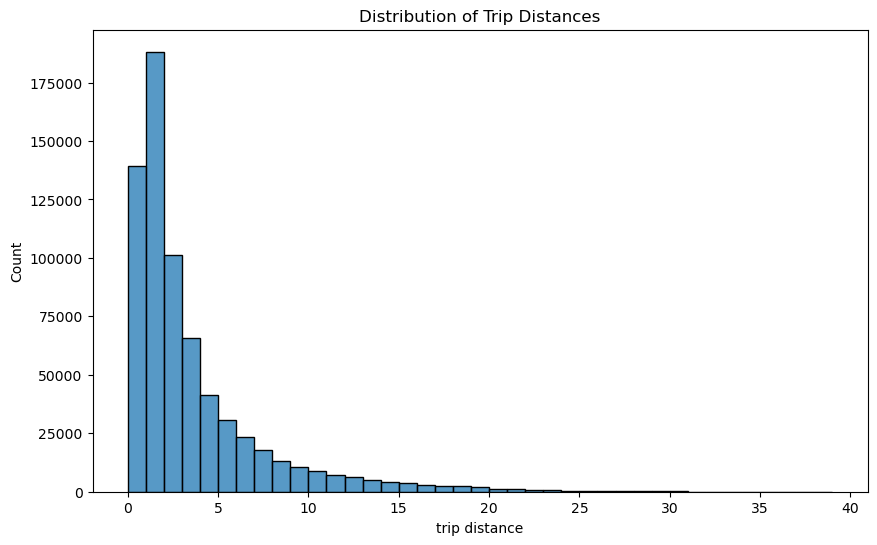

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: What is the distribution of trip distances?
plt.figure(figsize=(10,6))
sns.histplot(df['trip distance'], bins=range(0, 40, 1))
plt.title('Distribution of Trip Distances')
plt.show()

Most trips are the smaller trips, as the distance increases the number of trips decreases.

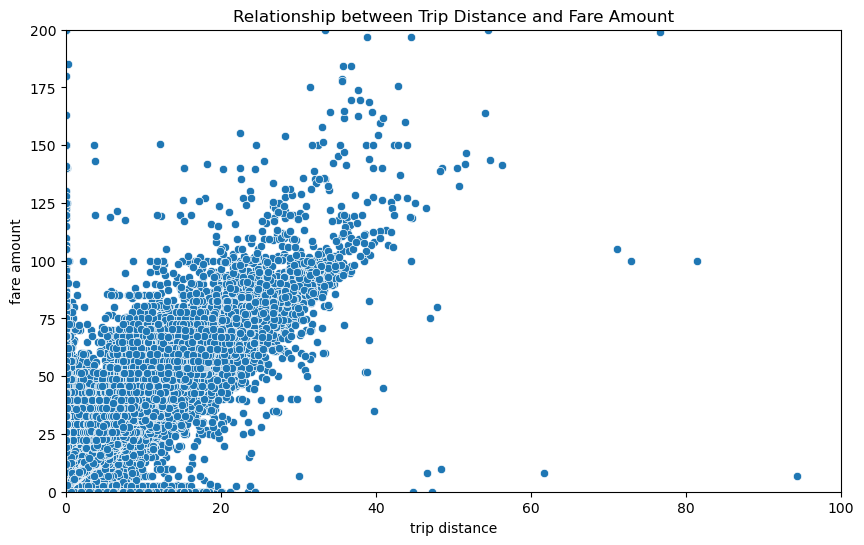

In [42]:
# Question 2: What is the relationship between trip distance and fare amount?
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip distance', y='fare amount', data=df)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlim(0, 100) 
plt.ylim(0, 200) 
plt.show()

Most of time fare amount increases by increasing the trip distance.

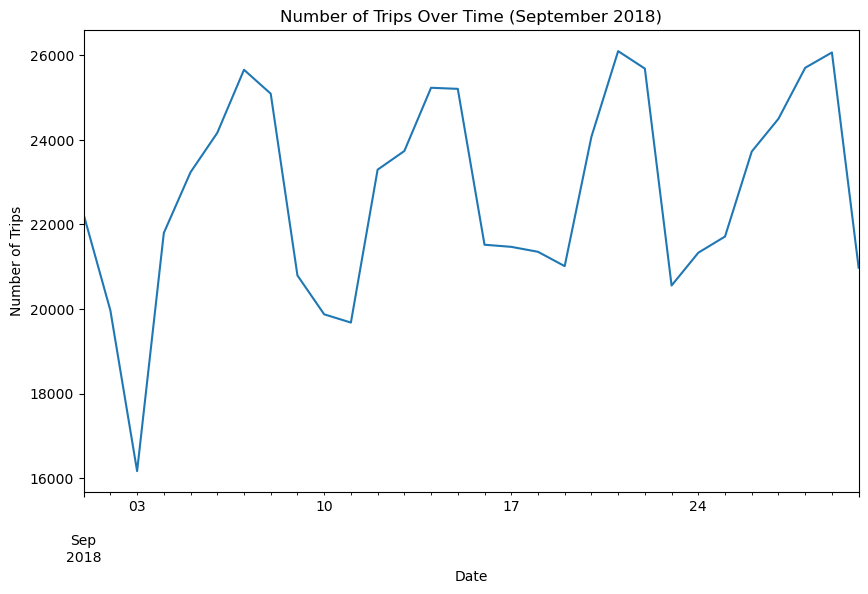

In [35]:
# Question 3: How does the number of trips change over time?
# First, convert pickup and dropoff times to datetime
f=df.copy()
f['lpep pickup datetime'] = pd.to_datetime(df['lpep pickup datetime'])
f['lpep dropoff datetime'] = pd.to_datetime(df['lpep dropoff datetime'])

# Then, resample to get the number of trips per day
september_data = f[(f['lpep pickup datetime'] >= '2018-09-01') & (f['lpep pickup datetime'] <= '2018-10-01')]

# Then, resample to get the number of trips per day
trips_per_day = september_data.resample('D', on='lpep pickup datetime').size()

plt.figure(figsize=(10, 6))
trips_per_day.plot(kind='line')
plt.xlabel('Date')
plt.title('Number of Trips Over Time (September 2018)')

plt.ylabel('Number of Trips')
plt.show()

Approximately in the wwekend the number of trips increase.

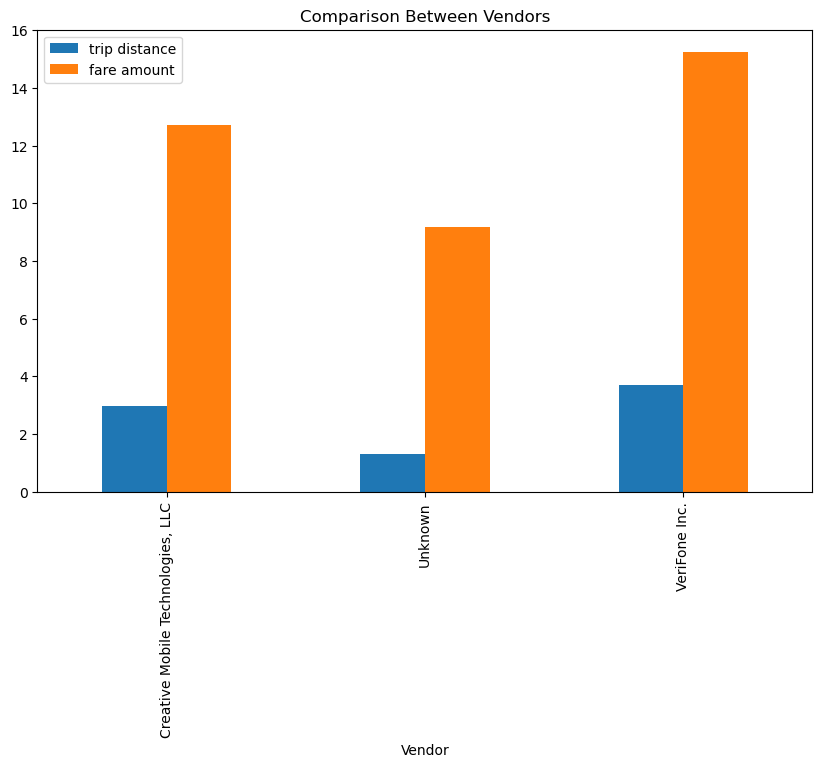

In [39]:
# Question 4: Are there differences between vendors?
# Group by vendor and calculate average trip distance and fare amount
vendor_comparison = df.groupby('Vendor')[['trip distance', 'fare amount']].mean()

# Plot
vendor_comparison.plot(kind='bar', figsize=(10,6))
plt.title('Comparison Between Vendors')
plt.show()

VeriFone Inc. has the higher trip distances and higher fares.

                 trip distance  fare amount
passenger count                            
1.0                   3.447881    14.217005
2.0                   3.515592    14.607786
3.0                   3.516725    14.671987
4.0                   3.480256    14.725539
5.0                   3.508765    14.608516
6.0                   3.035981    13.307837
7.0                   0.025714    17.328571
8.0                   0.260833     6.800000
9.0                   4.260000    25.500000
111.0                 1.435000     6.833333


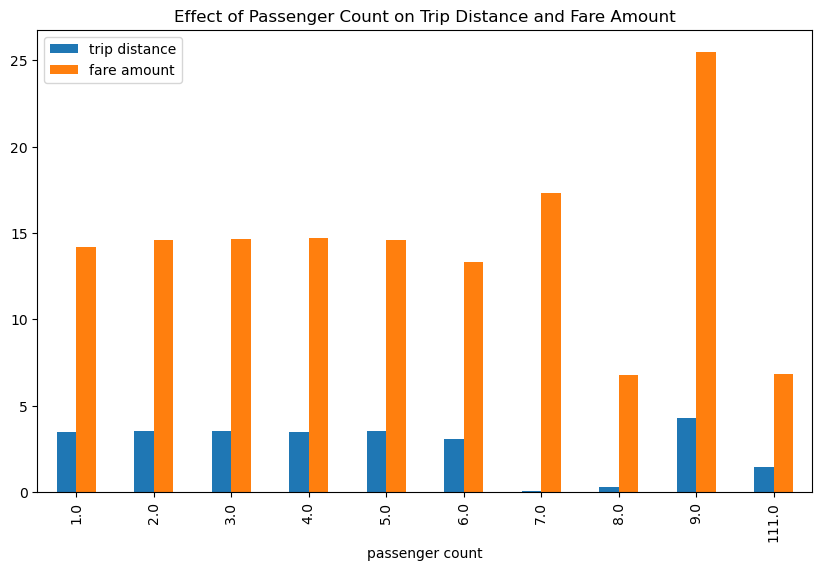

In [47]:
# Question 5: How does passenger count affect other variables?
# Group by passenger count and calculate average trip distance and fare amount
passenger_comparison = df.groupby('passenger count')[['trip distance', 'fare amount']].mean()
print(passenger_comparison)
# Plot
passenger_comparison.plot(kind='bar', figsize=(10,6))
plt.title('Effect of Passenger Count on Trip Distance and Fare Amount')
plt.show()

Approximately the more passengers the higher the fare amount. But it seems that for 7 and 8 passenger rides , the trip distance is very small.

# 3 - Cleaning Data

## Tidying up column names

## Observe inconsistent data

## Findings and conclusions

## Observing Missing Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet